## Imports

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()

clases_file = path.parent / "Data" / "ziplabel.csv"
responseLabels = np.loadtxt(clases_file)

data_file = path.parent / "Data" / "zipdata.csv"
X = np.loadtxt(data_file, delimiter = ",")

n, p = np.shape(X)

### 2 Perform hierarchical clustering on the zip data (example 3 in ESL). The data consist of 400 samples of handwritten digits 0-9 in 16x16 grayscale images (= 256 features).

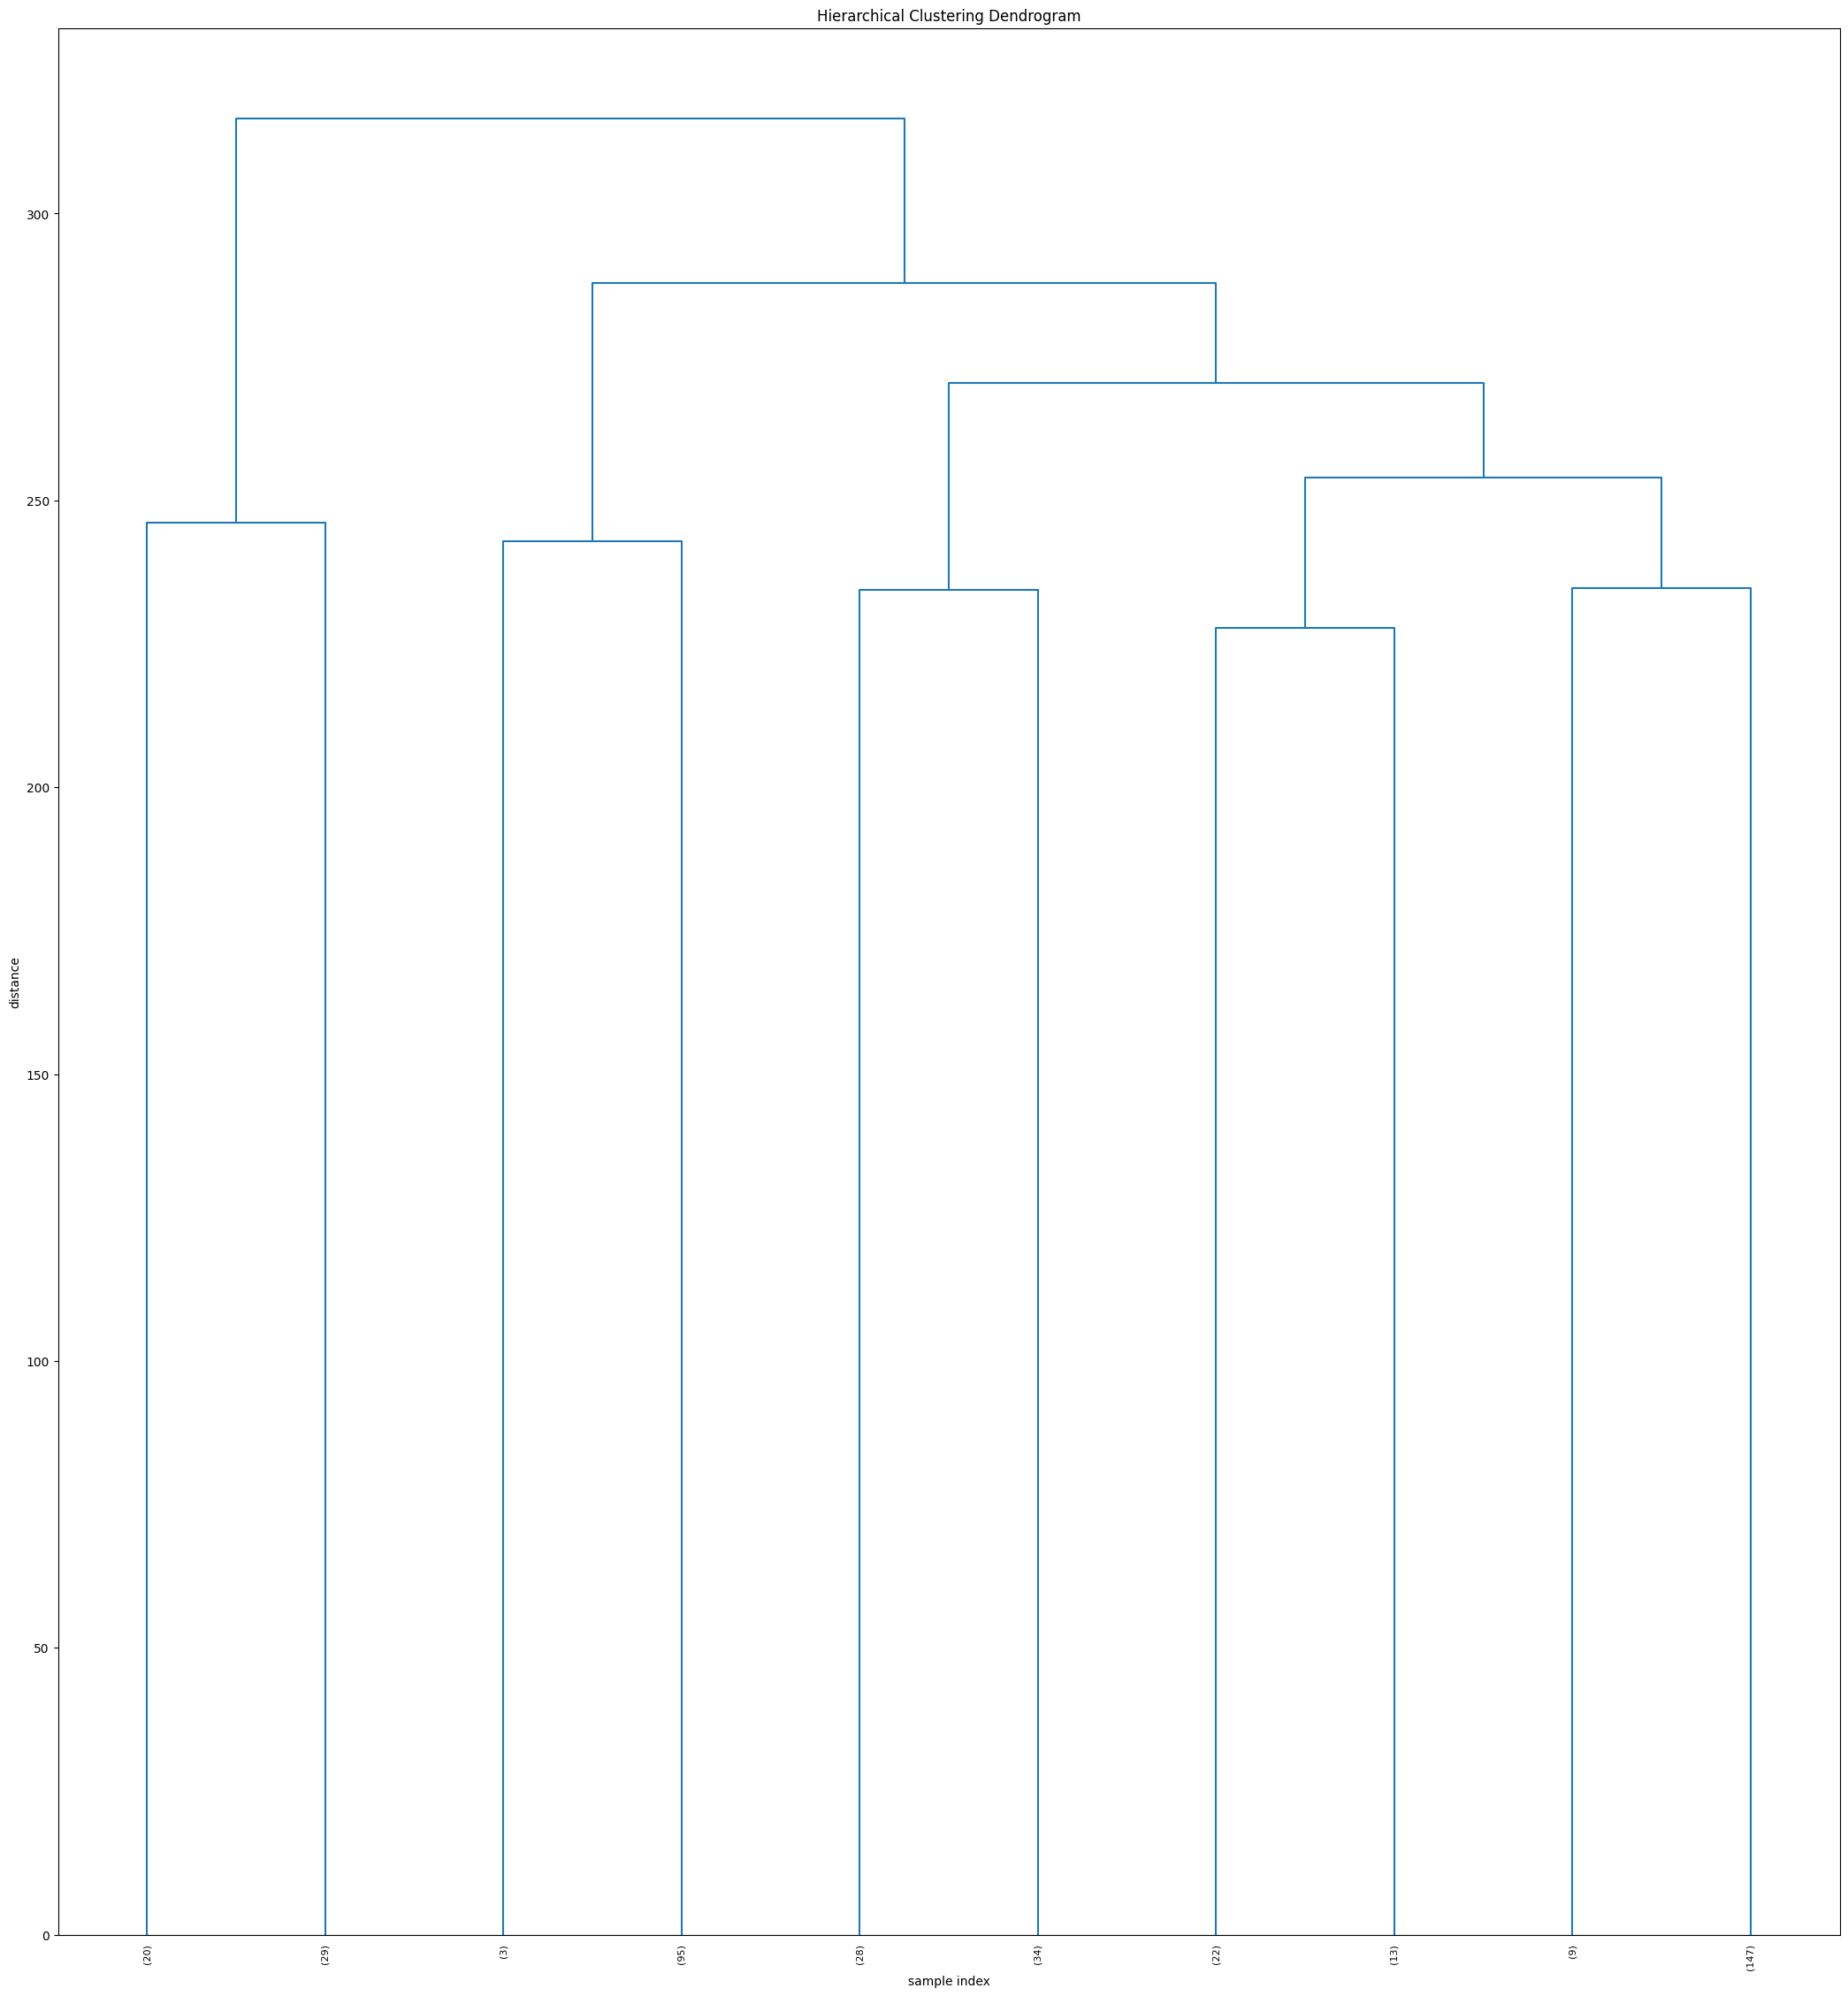

In [32]:
#For additional information concerning heirachical clustering in python, look at;
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

d_sample = 'cityblock' #See possible values: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
d_group = 'complete' #See possible values (method): https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
N_leafs = 10 #Number of leaf nodes. n=400

Z = linkage(X, method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance
plt.figure(figsize=(26,28))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

#for scipy dendogram look at;
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

den = dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p = N_leafs,
)
plt.show()

In [34]:
#look at the individual clusters
k=10 #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    print('The labels associated with cluster {} is:'.format(i))
    print(responseLabels[datapoints])
    print(np.unique(responseLabels[datapoints]))
    print('\n')

The labels associated with cluster 1 is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.]


The labels associated with cluster 2 is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0.]
[0. 2.]


The labels associated with cluster 3 is:
[9. 4. 4.]
[4. 9.]


The labels associated with cluster 4 is:
[4. 7. 7. 7. 7. 4. 7. 4. 7. 7. 4. 7. 4. 7. 7. 7. 4. 7. 7. 4. 2. 7. 4. 4.
 9. 7. 9. 7. 4. 9. 9. 9. 9. 4. 7. 9. 7. 9. 4. 4. 4. 4. 9. 9. 7. 7. 9. 7.
 4. 7. 7. 7. 7. 7. 7. 7. 2. 7. 7. 7. 7. 4. 4. 9. 9. 7. 5. 4. 9. 7. 9. 9.
 9. 4. 4. 9. 4. 4. 7. 9. 9. 7. 7. 9. 9. 9. 4. 5. 7. 4. 3. 9. 9. 7. 8.]
[2. 3. 4. 5. 7. 8. 9.]


The labels associated with cluster 5 is:
[3. 3. 8. 3. 3. 3. 3. 3. 3. 3. 8. 8. 8. 3. 5. 5. 5. 3. 3. 3. 3. 3. 8. 3.
 5. 8. 5. 5.]
[3. 5. 8.]


The labels associated with cluster 6 is:
[5. 2. 0. 0. 2. 0. 0. 8. 3. 5. 0. 2. 5. 0. 8. 0. 3. 5. 5. 8. 0. 0. 8. 8.
 5. 0. 0. 3. 5. 5. 0. 0. 5. 2.]
[0. 2. 3. 5. 8.]


The labels associated wit